<a href="https://colab.research.google.com/github/gyunini/Pytorch_Practice/blob/main/2_autograd_and_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nn.Module, nn.Parameter

In [ ]:
import torch
from torch import nn
from torch import Tensor

In [ ]:
class MyLiner(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.randn(out_features))

  def forward(self, x: Tensor):
    return x @ self.weights + self.bias

In [ ]:
x = torch.randn(5, 7) # rand는 0~1사이 랜덤값, randn은 평균 0, 표편1로 정규화

In [ ]:
x

tensor([[ 1.4873,  0.1047, -0.4048, -1.0113,  1.2893,  1.5140,  0.1594],
        [-0.3868, -0.5418, -1.4107,  0.6363,  1.8016,  0.3638,  1.2254],
        [-2.5031, -1.5457,  2.2105, -2.0376,  0.9166, -0.0881,  1.3307],
        [-0.2787,  0.9193, -0.3452,  0.7597, -0.7798,  1.0288, -0.4240],
        [ 1.2128,  1.1084,  0.6800,  0.6342,  1.9649,  0.8074, -0.4244]])

In [ ]:
layer = MyLiner(7, 12)
layer(x) # layer.forward(x)와 동일

tensor([[-1.0178, -0.2655, -0.7516,  0.4898,  2.5158,  0.6498, -7.4224,  3.1164,
          0.6281,  0.4167,  3.5087, -0.1306],
        [-1.7893, -1.9393, -2.2103,  1.5772,  4.2393, -0.1366, -1.6211,  4.6412,
          0.9565, -3.1039,  3.2434, -3.3643],
        [-3.7974,  1.5825, -7.5967,  3.1481,  0.5414, -4.7739, -2.2736,  4.0223,
         -0.9684,  0.1280,  3.4648,  5.5343],
        [ 0.6049, -3.4632,  1.1115,  1.8301, -3.3337, -1.4294,  4.6226, -6.5809,
          0.1904, -0.7625, -3.5949, -1.1624],
        [-1.1671, -3.1841, -0.9903, -4.8697,  2.6838,  0.8409, -4.3142,  6.2245,
          0.9998,  1.1017,  1.1402, -3.4420]], grad_fn=<AddBackward0>)

In [ ]:
layer(x).shape # 5,12로 변경됨

torch.Size([5, 12])

In [ ]:
for value in layer.parameters(): # 앞서 파라미터를 nn.Parameter로 랜덤하게 생성했기 때문에 7,12 파라미터 생성을 확인 가능
  print(value) # 마지막에 requires_grad=True로 gradient의 대상임을 볼 수 있음

Parameter containing:
tensor([[-2.6194e-01,  1.4440e+00,  9.0679e-01, -1.6479e+00,  4.9237e-01,
          1.7151e+00, -2.3071e+00,  6.5725e-01, -2.4064e-01,  9.0458e-02,
          4.3696e-01, -9.9735e-02],
        [ 6.7326e-01, -2.0038e+00, -3.9657e-01, -3.5064e-01, -8.7725e-01,
         -1.3407e-01,  1.0103e+00, -1.9857e-01, -4.9684e-02,  2.6847e-01,
         -1.6418e+00, -2.2352e-01],
        [-6.2170e-01,  7.6230e-01, -4.9584e-01, -1.3653e+00, -4.2239e-01,
          2.2091e-01, -5.7781e-01,  6.7910e-01, -4.0042e-01,  6.3915e-01,
         -3.6227e-01,  5.5314e-01],
        [-1.1949e-01, -2.8628e-01,  9.5013e-01, -9.9771e-01,  8.8163e-02,
          8.2068e-01,  1.5723e+00, -3.6767e-01,  1.1126e-01, -7.0587e-01,
         -8.8212e-01, -1.9593e+00],
        [-2.9710e-01, -8.7287e-01, -9.5163e-01, -9.0338e-01,  2.1299e+00,
         -1.4068e-01, -1.8252e+00,  3.9475e+00,  6.0650e-01,  3.5115e-01,
          1.6997e+00, -1.0981e+00],
        [ 3.2136e-01, -3.7564e-01,  6.3329e-01,  1.9043e+0

- weight를 Tensor로 선언할 때의 차이점?

In [ ]:
class MyLiner(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    self.weights = Tensor(torch.randn(in_features, out_features))
    self.bias = Tensor(torch.randn(out_features))

  def forward(self, x: Tensor):
    return x @ self.weights + self.bias

layer = MyLiner(7, 12)
layer(x)

tensor([[ 5.8616,  0.1261,  3.0183,  0.8695,  0.8273, -3.1934,  3.3277,  2.1242,
          5.2039,  3.4688,  0.5824,  0.3629],
        [ 2.4140, -1.6936,  7.7858,  1.3854,  2.7115, -2.8446,  7.1945, -0.2296,
         -0.1501,  0.1331,  0.9504,  0.4411],
        [ 0.0653, -3.5706,  0.5325,  0.7627,  1.5913, -3.3350,  5.3133, -3.0867,
         -2.3472,  6.0494, -3.9001, -5.4189],
        [-0.2456,  0.7656, -0.7527, -3.7554, -0.2350,  4.0921,  0.4562,  1.0695,
          2.0481, -0.0537,  0.6119, -0.5081],
        [ 4.5600,  1.7856,  1.8805,  0.8912,  0.2942, -0.2301,  7.3293,  0.2621,
         -5.0977, -2.4482, -3.8155, -1.7962]])

- 하지만 미분의 대상이기 아니기 때문에 안찍힘

In [ ]:
for value in layer.parameters():
  print(value)

- Parameter을 직접 선언할 일은 거의 없다!

# AutoGrad for Linear Regression

y = 2x + 1

In [ ]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [ ]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [ ]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(LinearRegression, self).__init__() # super(파생클래스, self).메서드 -> 현재 클래스가 어떤 클래스인지 명확하게 표시
    self.linear = torch.nn.Linear(inputSize, outputSize) # x*W + b를 구현해놓은 모듈

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
inputDim = 1    # takes variable 'x'
outputDim = 1   # takes variable 'y'
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)

### for GPU ###
if torch.cuda.is_available():
  model.cuda()

In [ ]:
criterion = torch.nn.MSELoss()    # mean squeared error
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # 대상이 되는 파라미터 정의

In [ ]:
for epoch in range(epochs):
  # Converting inputs and labels to Variable
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
  else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

  # graident를 버퍼에서 삭제 - 다음 에폭으로 누적하지 않기 위해서
  optimizer.zero_grad()

  # model로부터 output 계산
  outputs = model(inputs)

  # loss 계산
  loss = criterion(outputs, labels) # x, y
  print(loss)
  # get gradient - Forward의 결과값 (model의 리턴값 - output=예측치)과 실제값간의 차이(loss)에 대해 미분을 수행
  loss.backward()

  # update parameters
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item())) # 모델에서 계산된 loss 가 있다면, loss.item()을 통해 loss의 스칼라 값을 가져올 수 있다.

tensor(158.7229, grad_fn=<MseLossBackward0>)
epoch 0, loss 158.7229461669922
tensor(13.3308, grad_fn=<MseLossBackward0>)
epoch 1, loss 13.330817222595215
tensor(1.4674, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.4673542976379395
tensor(0.4954, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.4954459071159363
tensor(0.4120, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.4119742512702942
tensor(0.4010, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.4010166823863983
tensor(0.3960, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.39601975679397583
tensor(0.3916, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.39155521988868713
tensor(0.3872, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.38717910647392273
tensor(0.3829, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.38285529613494873
tensor(0.3786, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.37858036160469055
tensor(0.3744, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.37435272336006165
tensor(0.3702, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.370172381401062
te

In [ ]:
with torch.no_grad(): # 더이상 gradient가 test시에는 필요하지 않기 때문에 비활성화
  if torch.cuda.is_available():
     predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy() # forward시킴
  else:
     predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
  print(predicted) # 결과를 보면 약간 오차가 있음...

[[ 0.3055938]
 [ 2.4055946]
 [ 4.5055957]
 [ 6.6055965]
 [ 8.705597 ]
 [10.805597 ]
 [12.905599 ]
 [15.0056   ]
 [17.1056   ]
 [19.2056   ]
 [21.305601 ]]


In [ ]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

# Logistic Regression

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(torch.__version__)

2.0.1+cu118


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
DATA_PATH = 'https://download.pytorch.org/tutorial/hymenoptera_data'

In [ ]:
# import urllib
# import os
# import shutil
# from zipfile import ZipFile

# urllib.request.urlretrieve(DATA_PATH, 'hymenoptera_data.zip')

# with ZipFile('hymenoptera_data.zip', 'r') as zipObj:
#   # Extract all the contents of zip file in current directory
#   zipObj.extractall()

# os.rename('hymenoptera_data', 'data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/2023_AI/Pytorch강의/hymenoptera_data'

# 데이터가 이미지기때문에 변환해야함 - Tensor로도 만들고.. dataset을 train, val로 불러옴, DataLoader로 데이터를 패칭(GPU에 넣어줌)
class ReshapeTransform:
  def __init__(self, new_size):
    self.new_size = new_size

  def __call__(self, img):
    result = torch.reshape(img, self.new_size)
    return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
}

## load the corresponding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                for x in ['train', 'val']}

## load the entire dataset: we are using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],    # 다음시간에 배움
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                            batch_size=len(image_datasets['val']),
                                            shuffle=True)

torch.Size([244, 150528]) torch.Size([244])


<ipython-input-26-dafb98505bd5>:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())


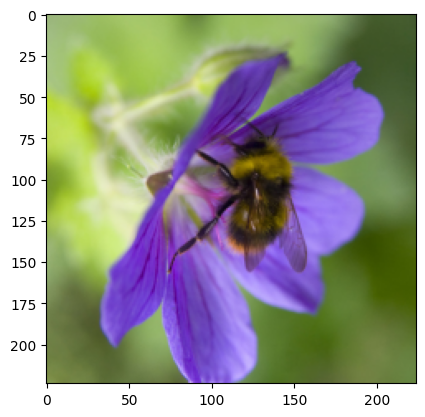

In [ ]:
## load the entire dataset - 제너레이터이기 때문에 iter로 바꾸고 next로 뽑아옴
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print(x.shape, y.shape)
plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

- 뽑아온 데이터로 logistic regression 구현

In [ ]:
class LR(nn.Module):
  def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
    super(LR, self).__init__()
    # initialize parameters
    self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
    self.b = torch.scalar_tensor(0).to(device)
    self.grads = {'dw': torch.zeros(dim, 1, dtype=torch.float).to(device),
                  'db': torch.scalar_tensor(0).to(device)}
    self.lr = lr.to(device)

  def forward(self, x):
    ## compute forward
    z = torch.mm(self.w.T, x) + self.b
    a = self.sigmoid(z)
    return a

  def sigmoid(self, z):
    return 1/(1 + torch.exp(-z))

  def backward(self, x, yhat, y):
    ## compute backward
    self.grads['dw'] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
    self.grads['db'] = (1/x.shape[1]) * torch.sum(yhat - y)

  def optimize(self):
    ## optimize step
    self.w = self.w - self.lr * self.grads['dw']
    self.b = self.b - self.lr * self.grads['db']

## utility functions
def loss(yhat, y):
  m = y.size()[1]
  return -(1/m)*torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

def predict(yhat, y):
  y_prediction = torch.zeros(1, y.size()[1])
  for i in range(yhat.size()[1]):
    if yhat[0, i] <= 0.5:
      y_prediction[0, i] = 0
    else:
      y_prediction[0, i] = 1
  return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [ ]:
## model pretesting
x, y = next(iter(train_dataset))

## flaten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

## num_px is the dimention of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print('Cost: ', cost)
print('Accuracy: ', prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [ ]:
## hyperparameters
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform data
def transform_data(x, y):
  x_flatten = x.T
  y = y.unsqueeze(0)
  return x_flatten, y

## training the model
for i in range(num_iterations):
  x, y = next(iter(train_dataset))
  test_x, test_y = next(iter(test_dataset))
  x, y = transform_data(x, y)
  test_x, test_y = transform_data(test_x, test_y)

  # forward
  yhat = lrmodel.forward(x.to(device))
  cost = loss(yhat.data.cpu(), y)
  train_pred = predict(yhat, y)

  # backward
  lrmodel.backward(x.to(device), yhat.to(device), y.to(device))
  lrmodel.optimize()

  # test
  yhat_test = lrmodel.forward(test_x.to(device))
  test_pred = predict(yhat_test, test_y)

  if 1 % 10 == 0:
    costs.append(cost)

  if i % 10 == 0:
    print('Cost after iteration {}: {} | Train Acc: {}'.format(i, cost, train_pred, test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969
Cost after iteration 10: 0.6691471338272095 | Train Acc: 64.3442611694336
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047
Cost after iteration 30: 0.6367825865745544 | Train Acc: 68.03278350830078
Cost after iteration 40: 0.6245337128639221 | Train Acc: 69.67213439941406
Cost after iteration 50: 0.6139225363731384 | Train Acc: 70.90164184570312
Cost after iteration 60: 0.6045235395431519 | Train Acc: 72.54098510742188
Cost after iteration 70: 0.5960512161254883 | Train Acc: 74.18032836914062
Cost after iteration 80: 0.5883085131645203 | Train Acc: 73.77049255371094
Cost after iteration 90: 0.5811557769775391 | Train Acc: 74.59016418457031
